In [1]:
import json


# JSONファイルを読み込む
with open('trainer_state.json', 'r') as file:
    data = json.load(file)
json_data = json.dumps(data)
data_list = json.loads(json_data)

log_history = data_list.get("log_history")

# "train_loss"を格納するリストを作成
train_losses = []
eval_losses  = []

# 各辞書要素から"train_loss"キーに対応する値を取得し、リストに追加
for item in log_history:
    #print(item)
    train_loss = item.get("loss")
    train_losses.append(train_loss)
    eval_loss = item.get("eval_loss")
    eval_losses.append(eval_loss)


# 結果の表示
print(train_losses)
print(eval_losses)

[3.1028, None, 2.5567, None, 2.4129, None, 2.311, None, 2.2265, None, 2.1581, None, 2.1027, None, 2.0586, None, 2.0273, None, 2.0059, None, None]
[None, 2.6418025493621826, None, 2.576458692550659, None, 2.5595037937164307, None, 2.5650036334991455, None, 2.582531690597534, None, 2.5928237438201904, None, 2.611631155014038, None, 2.6259448528289795, None, 2.638535499572754, None, 2.6448724269866943, None]


In [2]:
train_losses = [loss for loss in train_losses if loss is not None]
eval_losses = [loss for loss in eval_losses if loss is not None]
print(min(train_losses))
minmin = min(eval_losses)

eval_losses.index(minmin)

2.0059


2

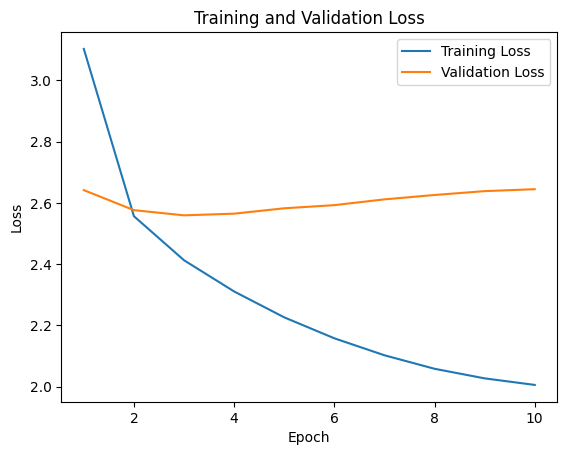

In [3]:
import matplotlib.pyplot as plt
fig=plt.figure()
    
# エポック数
epochs = range(1, len(train_losses) + 1)

# 学習曲線をプロット
plt.plot(epochs, train_losses, label='Training Loss')
plt.plot(epochs, eval_losses, label='Validation Loss')

# グラフのタイトルと軸ラベル
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

# 凡例を表示
plt.legend()

# グラフを表示
plt.show()
fig.savefig(f"kyoukan_model_loss.png")